# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Download the dataset from [here](https://drive.google.com/file/d/1jkkOcWm9aEF8gb0r2SsarF5Qdoaaw1do/view?usp=sharing) and place it in the data folder

In [2]:
titanic = pd.read_csv("data/titanic.csv",sep=",")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
# Numerical variables
titanic_numerical = titanic.select_dtypes(["int64","float64"])
#titanic_numerical =  titanic.select_dtypes("number")
titanic_numerical.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [5]:
# Categorical variables
titanic_categorical = titanic.select_dtypes("object")
titanic_categorical.head(3)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S


In [6]:
titanic_numerical = titanic.select_dtypes(["int64","float64"])
titanic_numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [7]:
# Plot style change
plt.style.use("classic")
# Figure size change
plt.rcParams['figure.figsize'] = (12,6)

#### Use the right visulalization to show the distribution of the column Age.

TypeError: __init__() got an unexpected keyword argument 'labelcolor'

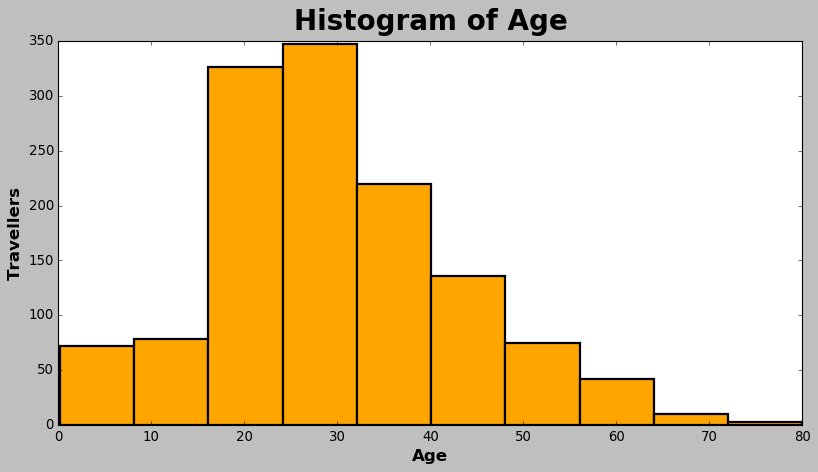

In [8]:
# Pandas plots are based on matplotlib
# Plot the histogram of column Age
# Set titles, labels, etc

plt.hist(titanic["Age"],label="# of people",color="orange",linewidth=2)
plt.title("Histogram of Age",size=25,fontweight="bold",pad=10)
plt.xlabel("Age",size=15,fontweight="bold")
plt.ylabel("Travellers",size=15,fontweight="bold")
plt.legend(edgecolor="k",facecolor="green",labelcolor="k")

# Show the plot
#paolo: here and also below the cell gives the plot but you also get an error
# that blocks the execution of the notebook. Could you please try to fix it?
# check the message at the end of the error message, that would give you the hint

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

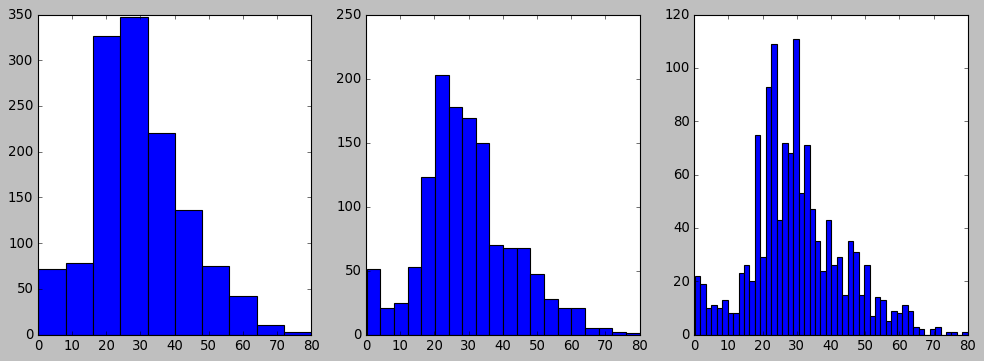

In [9]:
# Variables
# Create a figure of a fixed size and axes
fig1, axes = plt.subplots(1,3,figsize=(15,5))

# Plot the histogram using a different number of bins

axes[0].hist(titanic_numerical["Age"],bins=10)
axes[1].hist(titanic_numerical["Age"],bins=20)
axes[2].hist(titanic_numerical["Age"],bins=50)

#### How does the bin size affect your plot? Comment.

Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise)

#### Use seaborn to show the distribution of the column Age.

TypeError: __init__() got an unexpected keyword argument 'labelcolor'

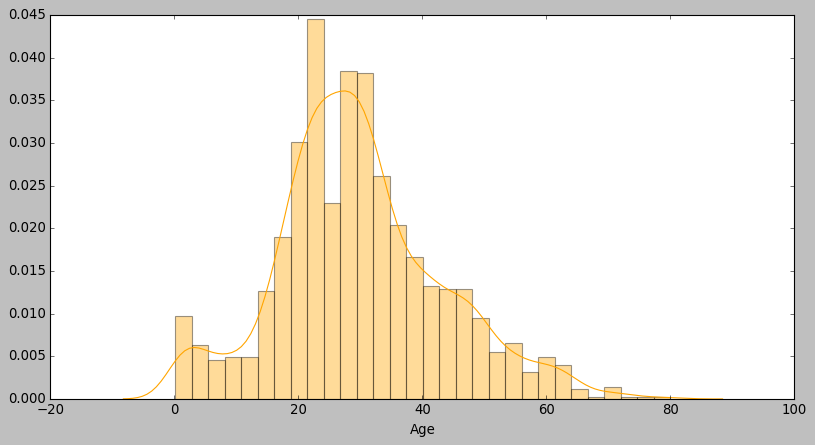

In [10]:
# Seaborn is a Python library based on matplotlib
# Plot of the age histogram using seaborn
sns.distplot(titanic["Age"],color="orange",label="ages");  # Used for visualizing distribution.
plt.legend(facecolor="gray",labelcolor="k",edgecolor="k")
# Show the plot

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

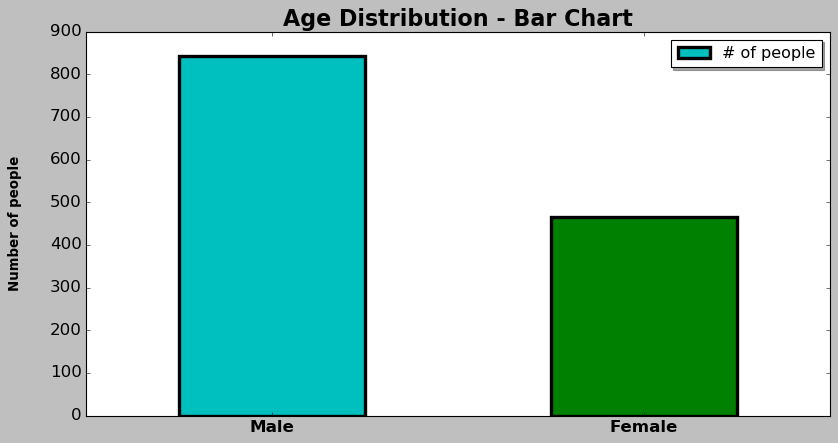

In [11]:
## OPTION 1 - Matplotlib
fig2, ax = plt.subplots(figsize=(12,6))

# Bar plot of the gender
# Add labels to the plot and change xticks rotation

titanic["Gender"].value_counts().plot(kind="bar",rot=0,fontsize=15,label=("# of people"),
                                     color=("c","g"),linewidth=3)
plt.ylabel("Number of people",rotation=90,labelpad=25,fontweight="bold")
plt.title("Age Distribution - Bar Chart",fontweight="bold",size=20)
ax.set_xticklabels(["Male","Female"],fontweight="bold")
ax.set_xticks([0,1])
plt.legend(shadow=True)

# Show the plot

Text(0, 0.5, 'Passengers')

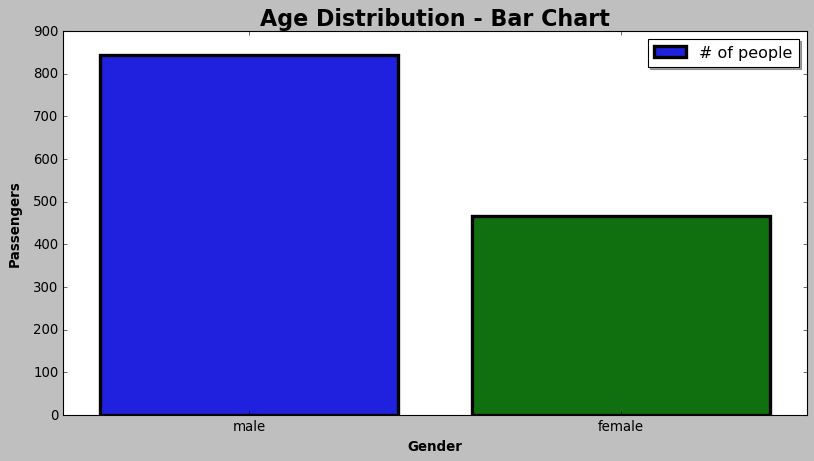

In [12]:
# OPTION 2 - Seaborn
# Seaborn Countplot

#sns.set(style="darkgrid")
sns.countplot(titanic["Gender"],linewidth=3,label="# of people")
plt.legend(shadow=True)
plt.title("Age Distribution - Bar Chart",fontweight="bold",size=20)
plt.xlabel("Gender",fontweight="bold")
plt.ylabel("Passengers",fontweight="bold",labelpad=10)
# Show the plot

#### Use the right plot to visualize the column Pclass.

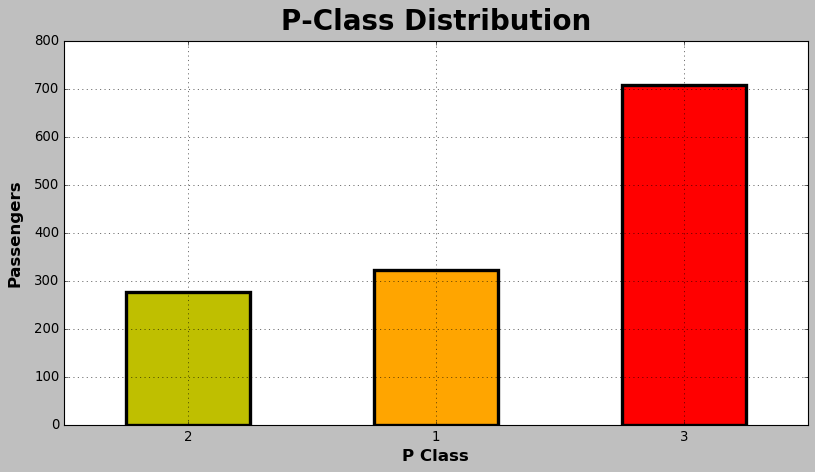

In [13]:
# Bar plot of Pclass
# Add labels to the plot and change xticks rotation
aa=["a","b","c"]
titanic["Pclass"].value_counts().sort_values().plot(kind="bar",rot=0,
                color=(["y","orange","r"]),linewidth=3)
plt.title("P-Class Distribution",fontweight="bold",size=25,pad=10)
plt.xlabel("P Class",size=15,fontweight="bold")
plt.ylabel("Passengers",size=15,fontweight="bold",labelpad=10)
plt.grid(True)
# Show the plot


#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

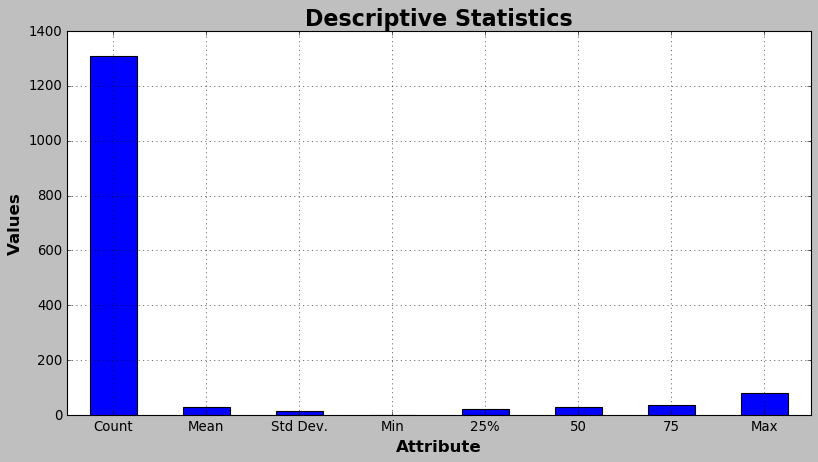

In [14]:
# Box plot
col_names = ("Count","Mean","Std Dev.","Min","25%","50","75","Max")
titanic["Age"].describe().plot(kind="bar").set_xticklabels(col_names)
plt.xticks(rotation=0)
plt.title("Descriptive Statistics",fontweight="bold",size=20)
plt.xlabel("Attribute",fontweight="bold",size=15)
plt.ylabel("Values",fontweight="bold",size=15)
plt.grid(True)
# Show the plot
#paolo: this plot does not work, don't uderstand what your goal is here

<BarContainer object of 8 artists>

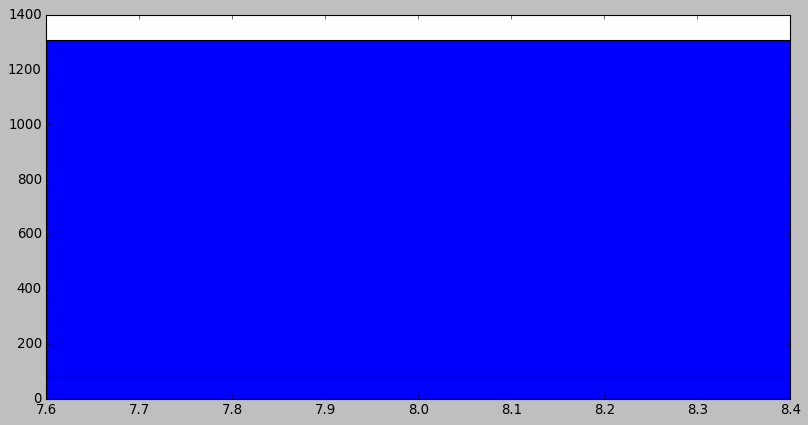

In [15]:
plt.bar(len(titanic["Age"].describe()),titanic["Age"].describe())
#paolo: what is this?

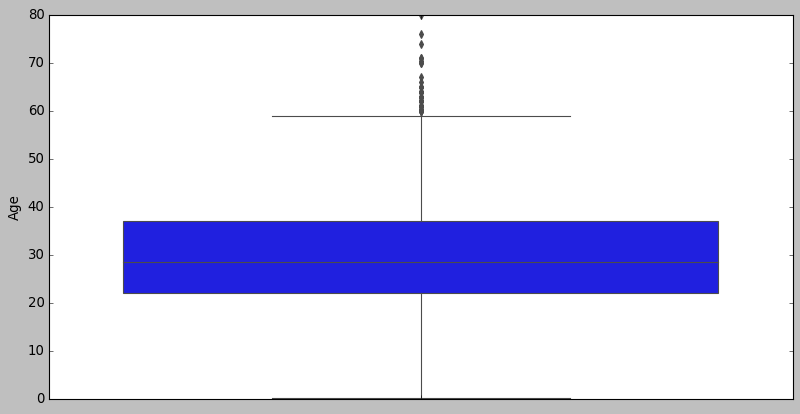

In [16]:
sns.boxplot(y = titanic['Age'])
# Well till reading the answer, I'd go with the bar chart
# paolo: boxplot is fine.

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

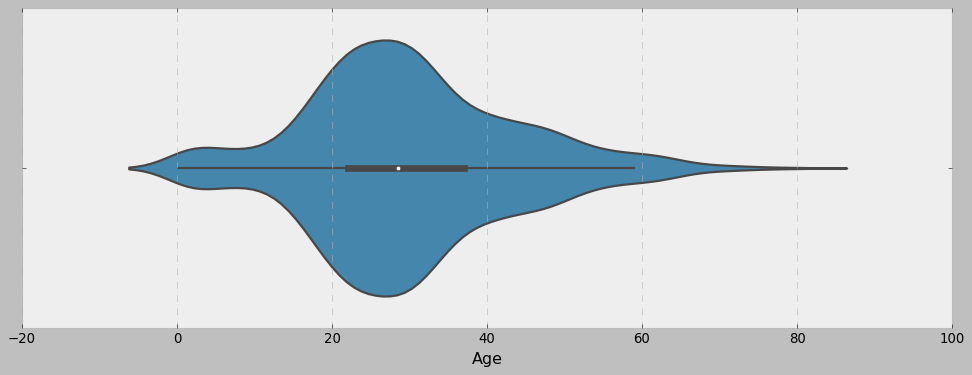

In [17]:
# Set figure size
plt.rcParams["figure.figsize"]=[15,5]
plt.style.use("bmh")
# Violin plot
# Show the plot
sns.violinplot(titanic["Age"])

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

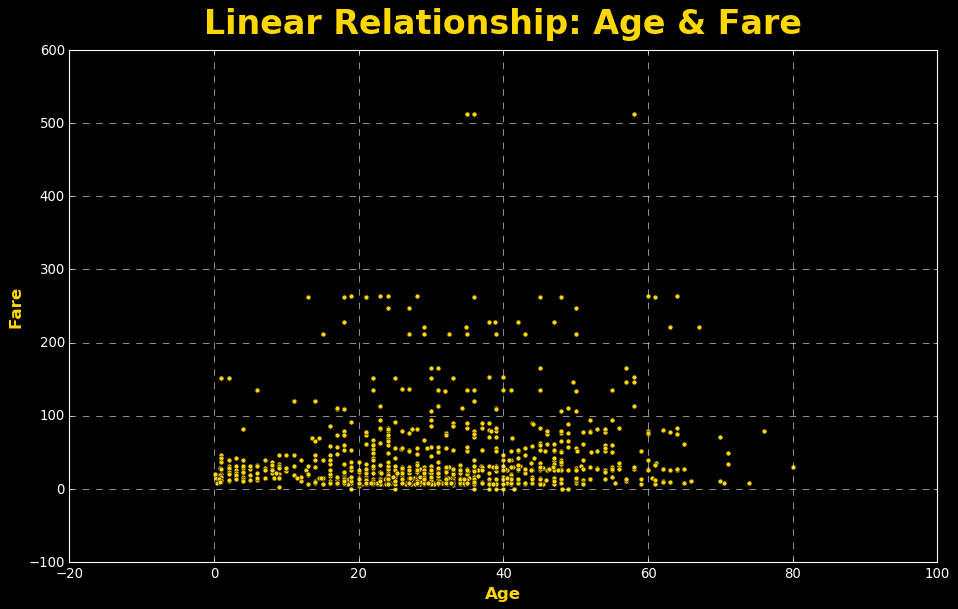

In [18]:
# OPTION 1
# Scatter plot
# Add labels
# Show the plot

plt.rcParams["figure.figsize"]=[14,8]
plt.style.use("dark_background")
plt.scatter(titanic["Age"],titanic["Fare"],edgecolor="k",facecolor="gold")
plt.title("Linear Relationship: Age & Fare",color="gold",size=30,fontweight="bold",pad=15)
plt.xlabel("Age",size=15,fontweight="bold",color="gold")
plt.ylabel("Fare",size=15,fontweight="bold",color="gold")
plt.grid(True)

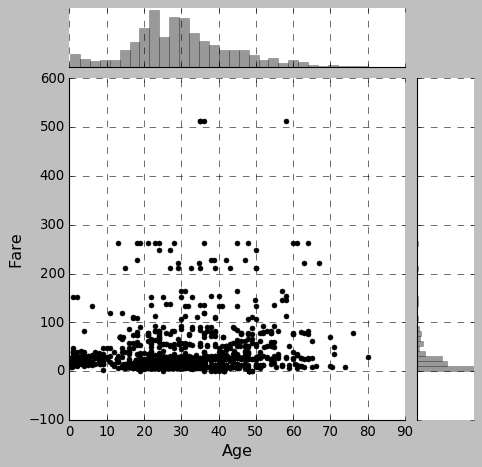

In [20]:
# OPTION 2
# Joinplot
# Show the plot

plt.style.use("grayscale")
sns.jointplot(titanic["Age"],titanic["Fare"],facecolor="k")

#### Using Seaborn plot the correlation matrix.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

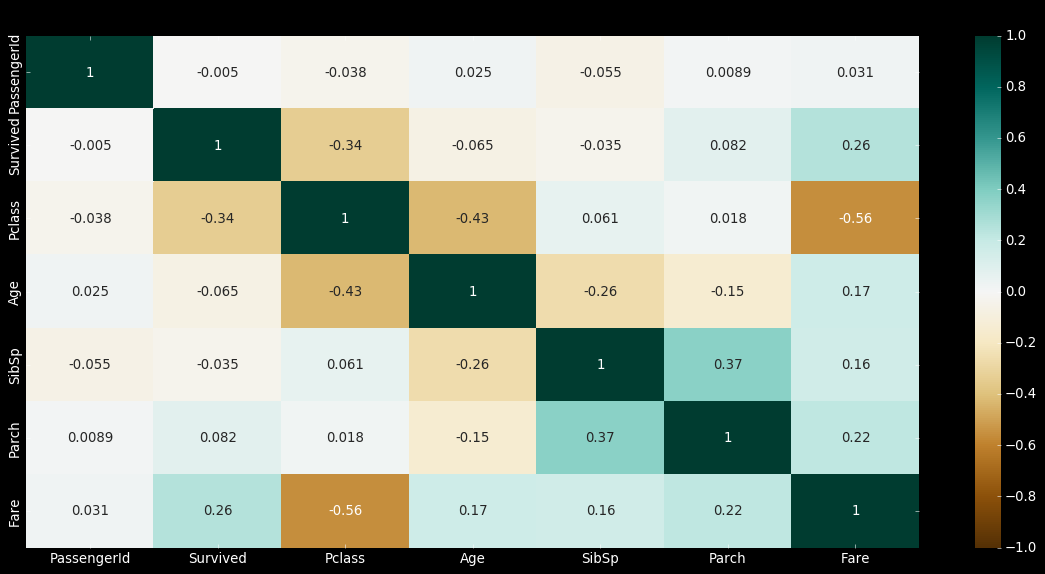

In [19]:
# Set figure size
plt.rcParams["figure.figsize"]=[18,8]

# Correlation matrix
# Add title
# Show plot

sns.heatmap(titanic.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG");
plt.title("Correlation Matrix",size=25,fontweight="bold",color="k")
plt.xticks(rotation=0)

#### What are the most correlated features? Comment.

~~~~~
The most correlated features are Parch and SibSp.
~~~~~

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

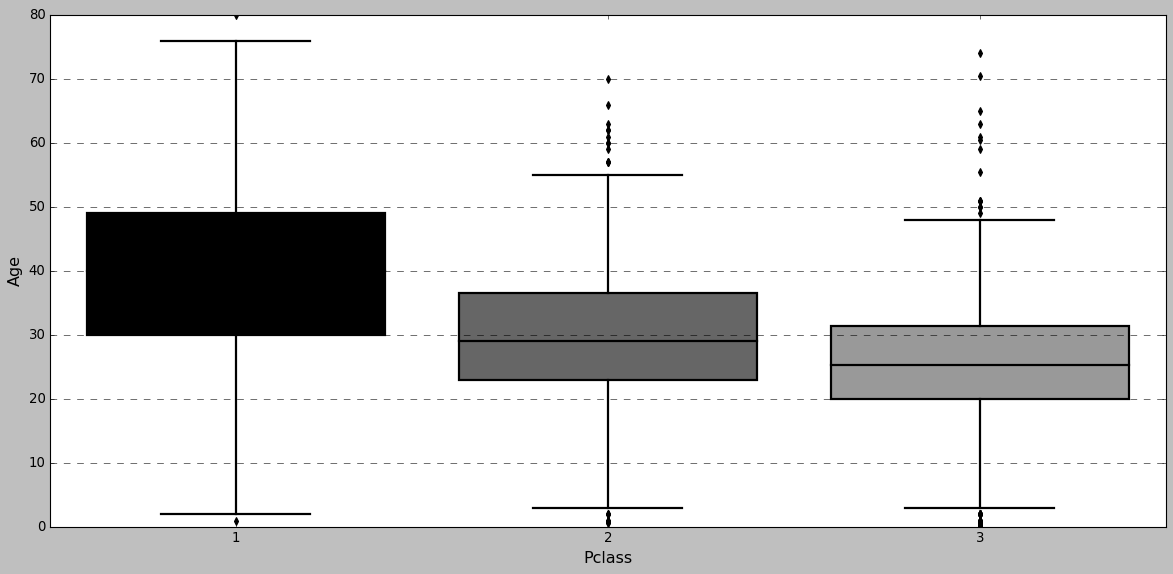

In [21]:
# Boxplot
sns.boxplot(titanic["Pclass"],titanic["Age"])
# Show the plot

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

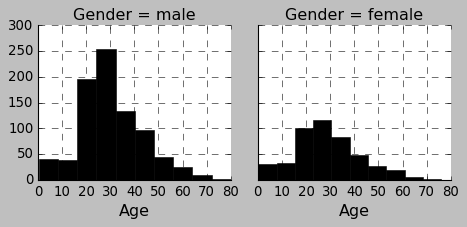

In [22]:
# Create a grid with FacetGrid
fig_last = sns.FacetGrid(titanic,col="Gender")

# Draw a plot on each facet
# Show the plot
fig_last_plot  = fig_last.map(plt.hist, "Age")

In [23]:
#paolo:yes good work